In [20]:
# Initialize Otter
import otter
grader = otter.Notebook("08_2_Binaere_Bilder.ipynb")

# Computational Thinking WS2023/24

**Autoren:**

- Dr. Benedikt Zönnchen
- Prof. Martin Hobelsberger
- Prof. Benedikt Dietrich


## Repräsentation von Bild und Text

In diesem Notebook üben wir den Umgang mit Listen in Kombination mit den boolschen Operationen **NOT**, **AND**, **OR** und **XOR**.
Dabei nutzen wir Listen als eine Repräsentation von Schwarz-Weiß-Bildern und erstellen dadruch zweidimensionale Codes als Bilder, welche wir zur Übertragung von Informationen verwenden können.

Die letzte Aufgabe soll Ihnen ein konkretes Anwendungsbeispiel vermitteln.

Für dieses Notebook benötigen Sie folgende Pakete:

- `otter-grader`
- `numpy`
- `pillow`
- `matplotlib`

Wenn dies notwendig ist, installieren Sie diese mit:

```
conda install [paketname]
```

oder

```
pip install [paketname]
```


## 1. Schwarz-Weiß-Bilder als Listen

Pixelbilder (auch genannt Rasterbilder) sind nichts weiter als eine geordnete Ansammlung von Zahlen.
Im Fall von Farbbildern besteht jeder Pixel aus drei Farbwerten, je einen für rot, grün und blau.
Graustufenbilder haben hingegen nur einen sog. Farbkanal, d.h. einen Wert je Pixel.
Wir wollen heute den Code dafür entwickeln um Schwarz-Weißbilder zu zeichnen.

Ein Pixel eines Schwarz-Weiß-Bildes besteht (wie beim Graustufenbild) nur aus einem Wert.
Dieser kann aber lediglich zwei konkrete Werte `0` (schwarz) oder `1` (weiß) annehmen.


---

**_Aufgabe 1 (Repräsentation)._**

Überlegen Sie sich eine (`Python`)-_Repräsentation_ eines Schwarz-Weiß-Bildes. Mit welcher Datenstruktur können wir ein solches Bild repräsentieren?


Wir wählen als Repräsentation eine 2-dimensionale Liste aus Nullen und Einsen.
Zum Beispiel:


In [4]:
picture = [[1, 1, 1, 1, 1, 1, 1, 1], # 1. Zeile
           [1, 1, 0, 1, 1, 0, 1, 1], # 2. Zeile
           [1, 1, 1, 1, 1, 1, 1, 1], # 3. Zeile
           [1, 0, 1, 1, 1, 1, 0, 1], # 4. Zeile
           [1, 1, 0, 0, 0, 0, 1, 1], # 5. Zeile
           [1, 1, 1, 1, 1, 1, 1, 1]] # 6. Zeile

Die folgende Funktion `plot_picture(picture, scale)` erwartet eine 2-dimensionale Liste aus Zahlen und zeichnet diese als Schwarz-Weiß-Bild.
Sie können die größe der Pixel mit dem Parameter `scale` steuern.


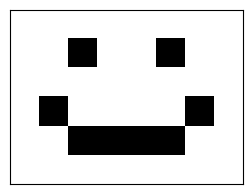

In [7]:
import matplotlib.pyplot as plt

def plot_picture(picture, scale=1.0):
    h = len(picture)
    w = len(picture[0])
    fig, ax = plt.subplots(figsize=(h*scale, w*scale))
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(picture, cmap='gray', vmin=0, vmax=1)
    ax.set_aspect(1.0)

plot_picture(picture, scale=0.5)

**_Aufgabe 2 (Erzeugung einer Zeichenfläche)._**

Schreiben Sie eine Funktion `create_canvas(width, height, border_width)` welche ein $\text{width} \times \text{height}$ Rasterbild zurückliefert. Dieses Bild soll einen schwarzen Rand besitzen, welches `border_width` Pixel breit ist.

```

```


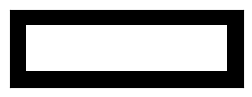

In [18]:
def create_canvas(width=10, height=10, border_width=1):
    picture = [[1] * width for _ in range(height)]

    for row in range(height):
        if (row <= border_width - 1) or row >= height - border_width:
            picture[row] = [0] * width
        else:
            for i in range(border_width):
                picture[row][i] = 0
                picture[row][width - i - 1] = 0
    
    return picture

plot_picture(create_canvas(30, 10, 2), scale=0.3)
# print(create_canvas(30, 10, 2))

In [21]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 1 message: Sieht richtig aus!

**_Aufgabe 3 (Logisches Not)._**

Schreiben Sie eine Funktion `invert(picture)` welche Ihr Bild invertiert, d.h. aus jeder Null eine Eins und aus jeder Eins eine Null macht. Die Funktion soll dabei eine neue Liste zürckliefern, sodass das `picture` unverändert bleibt.


In [29]:
def invert(picture):
    def inv(p):
        return 1 if p == 0 else 0

    return [list(map(inv, x)) for x in picture]

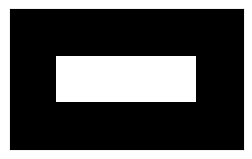

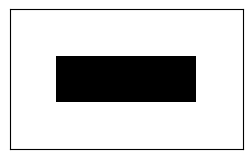

In [30]:
original = create_canvas(5, 3, 1)
plot_picture(original)
plot_picture(invert(original), scale=1)

In [31]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 1 message: Sieht richtig aus!

**_Aufgabe 4 (Logisches AND)._**

Schreiben Sie nun eine Funktion `intersect(picture1, picture2)` welche zwei Bilder der gleichen Größe erwartet und eine neuens Bild `intersection` erzeugt wobei der Pixel an Zeile `row` und Spalte `col` genau dann `1` ist wenn `picture1[row][col]` gleich `1` und `picture2[row][col]` gleich `1`


In [45]:
def intersect(picture1, picture2):
    new_picture = picture1

    for row_idx, row in enumerate(picture1):
        for col_idx, col in enumerate(row):
            if col == 1 and picture2[row_idx][col_idx] == 1:
                new_picture[row_idx][col_idx] = 1
            else:
                new_picture[row_idx][col_idx] = 0

    return new_picture

In [46]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Sieht richtig aus!

**_Aufgabe 5 (Logisches OR)._**

Schreiben Sie nun eine Funktion `union(picture1, picture2)` welche zwei Bilder der gleichen Größe erwartet und eine neuens Bild erzeugt wobei der Pixel an Zeile `row` und Spalte `col` genau dann `1` ist wenn `picture1[row][col]` gleich `1` oder `picture2[row][col]` gleich `1` oder beide.


In [47]:
def union(picture1, picture2):
    new_picture = picture1

    for row_idx, row in enumerate(picture1):
        for col_idx, col in enumerate(row):
            if col == 1 or picture2[row_idx][col_idx] == 1:
                new_picture[row_idx][col_idx] = 1
            else:
                new_picture[row_idx][col_idx] = 0

    return new_picture

In [48]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 1 message: Sieht richtig aus!

**_Aufgabe 6 (Logisches XOR)._**

Schreiben Sie nun eine Funktion `symmetric_diff(picture1, picture2)` welche zwei Bilder der gleichen Größe erwartet und eine neuens Bild erzeugt wobei der Pixel an Zeile `row` und Spalte `col` genau dann `1` ist wenn **entweder** `picture1[row][col]` gleich `1` **oder** `picture2[row][col]` gleich `1` jedoch **nicht** beide.


In [49]:
def sdiff(picture1, picture2):
    new_picture = picture1

    for row_idx, row in enumerate(picture1):
        for col_idx, col in enumerate(row):
            if (col == 1 and picture2[row_idx][col_idx] == 0) or (col == 0 and picture2[row_idx][col_idx] == 1):
                new_picture[row_idx][col_idx] = 1
            else:
                new_picture[row_idx][col_idx] = 0

    return new_picture

In [50]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Sieht richtig aus!

**_Aufgabe 7 (Logisches Zeichnen)._**

Schreiben Sie eine Funktion `create_alternating_canvas(h, w)`, die Bild erzeugt, welches einen schwarzen Rand der Pixelbreite 1 hat gefolgt von einem weißen inneren Rand gefolgt von einem schwarzen Rand usw.
Verwenden Sie ausschließlich die Funktionen `create_canvas` und `symmetric_diff`.

Hier ein Beispiel:


5

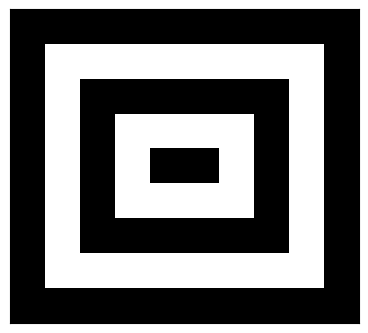

In [187]:
picture = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
           [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
           [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
           [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
           [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
           [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
           [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

plot_picture(picture, scale = 0.5)

len(picture[1]) // 2

30


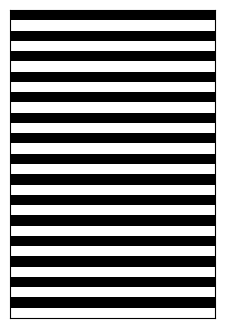

In [251]:
from math import floor


def create_alternating_canvas(h, w):
    return_picture = [[1] * w for _ in range(h)]

    for row in range(h):
        for col in range(w):
            if row % 2 == 0:
                return_picture[row][col] = 0

    # return picture

    # oh = h
    # ow = w

    # num_rectangles = w // 2
    # smallest_h = h // num_rectangles
    # smallest_w = w // num_rectangles

    # print(num_rectangles, smallest_h, smallest_w)

    # return_picture = create_canvas(smallest_w, smallest_h)

    # while smallest_h < oh + 1 and smallest_w < ow:
    #     smallest_h += floor(oh / num_rectangles)
    #     smallest_w += floor(ow / num_rectangles)
    #     next_bigger_picture = create_canvas(smallest_w, smallest_h)

    #     for row in range(len(return_picture)):
    #         # if row <= 2 or row >= len(return_picture) - 2:                
                
    #         # else:
    #             for col in range(len(return_picture[row])):
    #                 if col <= 1 or col == len(return_picture[row]) - 1 and row <= 1 or row >= len(return_picture) - 1:
    #                     next_bigger_picture[row] = next_bigger_picture[row - 1]
    #                 else:
    #                     next_bigger_picture[row][col] = return_picture[row - 1][col - 1]
        
    #     return_picture = next_bigger_picture

    # return_picture = create_canvas(h, w)
    # depth = 2

    # while h - depth > 0 and w - depth > 0:
    #     picture = create_canvas(h, w)

    #     h -= 2
    #     w -= 2

    #     one_smaller_picture = create_canvas(h, w)

    #     inner_picture = picture[1:]
    #     inner_picture = inner_picture[:-1]
        
    #     for row in range(len(inner_picture)):
    #         inner_picture[row] = inner_picture[row][1:]
    #         inner_picture[row] = inner_picture[row][:-1]

    #     sdiff_inner = sdiff(inner_picture, one_smaller_picture)
        
    #     combined_picture_and_inner = picture
    #     for row in range(len(picture)):
    #         for col in range(len(picture[0])):
    #             if (row <= 1 or row >= len(picture) - 3) or (col <= 1 or col >= len(picture[0]) - 3):
    #                 continue
    #             else:
    #                 if row - 1 >= 0 and col - 1 >= 0:
    #                     try:
    #                         combined_picture_and_inner[row][col] = sdiff_inner[row-1][col-1]
    #                     except:
    #                         continue
        
        # new_return = return_picture
        # for row in range(len(return_picture)):
        #     for col in range(len(return_picture[0])):
        #         if row < depth or col < depth:
        #             continue
        #         elif (row >= len(return_picture) - depth) and col >= len(new_return[row]) - depth:
        #             new_return[row][col] = 0
        #         else:
        #             if row - depth >= 0 and col - depth >= 0:
        #                 try:
        #                     new_return[row][col] = combined_picture_and_inner[row-depth][col-depth]
        #                 except:
        #                     continue
        
        # return_picture = new_return

        # h -= 1
        # w -= 1
        # depth += 2

    return return_picture

pic = create_alternating_canvas(30, 20)
print(len(pic))
plot_picture(pic, scale = 0.2)

In [ ]:
grader.check("q7")

### 2. Codierung von Text

Durch die folgenden zwei Aufgaben bauen wir uns die Funktionalität um Text in Bilder zu codieren und diese Bilder wieder zu decodieren.
Die sog. [QR-Codes](https://de.wikipedia.org/wiki/QR-Code), welche Sie wahrscheinlich schon einmal verwendet haben sind nichts anderes.
Wir bauen uns also unseren eigenen kleinen [QR-Codes](https://de.wikipedia.org/wiki/QR-Code).


**_Aufgabe 8 (Vereinfachter QR-Code - Codierung), schwere Aufgabe._**

[QR-Codes](https://de.wikipedia.org/wiki/QR-Code) speichern kleine Informationsschnippsel z.B. einen Link auf eine Webseite. Diese Codes können dann mit der (Handy)-Kamera gelesen und auf einem mobielen Gerät decodiert werden.

Schreiben Sie eine Funktion `encode(text, n)` welche die Zeichenkette `text` als Binärbild codiert / repräsentiert.
`n` sei dabei die Breite und Höhe des Bildes.

**Tipps:** Sie können die Funktion `ord(char)` und `bin(n)` verwenden, welche Ihnen in kombination z.B.


In [ ]:
bin(ord('c')) # 7 Bit

**Achtung:** Für bestimmte Zeichen liefert `bin(ord(char))` eine kürzere Bitfolge. Füllen Sie diese vorne mit Nullen auf, wenn dies notwendig ist.


In [ ]:
bin(ord(' ')) # nur 6 Bit !

ein Zeichen (hier `'a'`) in seine binäre _[ASCII-Codes](https://de.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange)_-Repräsentation umwandelt.

- Wie der kleine QR-Code, soll ihr Bild genau $n \times n$ Pixel besitzen
- Jedes Zeichen muss mit **genau 8 Bit codiert** werden
- Füllen Sie den möglichen rest mit Nullen auf.
- Gehen Sie davon aus, dass der Text nur Zeichen des [ASCII-Codes](https://de.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange) enthält (z.B. keine Umlaute etc.), **sodass jedes Zeichen genau 8 Bit benötigt**!

**Tipp:** Da Sie den eindimensionalen Text in ein zweidimensionales Bild schreiben, wäre eine kleine Hilfsfunktion nützlich, welche Ihnen für einen eindimensionalen Index, die korrekte Zeile und Spalte zurückliefert.


In [ ]:
def encode(text, n):
    qrpicture = create_canvas(n, n, n//2+1)
    limit = n * n
    ...
    return qrpicture   

In [ ]:
grader.check("q8")

Lassen Sie uns mal ein paar Bilder aus Text generieren.
Dazu haben wir Ihnen noch eine kleine Hilfsfunktion dazu gepackt, die Ihnen die kleinste mögliche Quadratzahl für den jeweiligen Text bestimmt.


In [ ]:
def smallest_square(n):
    for i in range(n):
        if i * i >= n:
            return i

text = 'Hello World'
n = smallest_square(len(text) * 8)
plot_picture(encode(text, n), scale = 0.2)

In [ ]:
text = 'https://www.hm.edu/'
n = smallest_square(len(text) * 8)
plot_picture(encode(text, n), scale = 0.2)

**_Aufgabe 9 (Vereinfachter QR-Code - Decodierung), schwere Aufgabe._**

Schreiben Sie eine Funktion `decode(qr_picture)`, die aus einem codierten Text (d.h. einem Bild `qr_picture` in unserem Format) den entsprechenden wieder herstellt.

**Tipps:**

- mit der Funktion `eval(binary)` können Sie eine Zahl in Binärdarstellung zu einer ganzen Zahl umwandeln
- mit `chr(n)` können Sie eine ganze Zahl in das entsprechende Zeichen umwandeln
- eventuell brauchen Sie eine ähnliche Hilfsfunktion wie beim Entwickeln Ihrer Funktion `encode`

Beispiel:


In [ ]:
binary = bin(ord('a'))
print(binary)
char = chr(eval(binary))
print(char)

In [ ]:
def decode(qr_picture):
    n = len(qr_picture)
    limit = n * n
    text = ''
    ...
    return text.replace('\x00', '') # ersetzt den Null-charater der durch chr(eval('0b000000)) entsteht
    

In [ ]:
grader.check("q9")

Lassen Sie uns das testen:


In [ ]:
text = 'Hello World'
n = smallest_square(len(text) * 8)
code_text = encode(text, n)
plot_picture(code_text, scale = 0.2)
print(decode(code_text))

In [ ]:
text = 'https://www.hm.edu/'
n = smallest_square(len(text) * 8)
code_link = encode(text, n)
plot_picture(code_link, scale = 0.2)
plot_picture(invert(code_link), scale = 0.2)
print(decode(code_link))

In [ ]:
text = 'Dies ist ein langer Geheimtext, den ich fuer die Unwissenden durch ein Bild uebertragen will. Ob das wohl gut geht? Vielleicht sollte ich mir noch eine Verschluesselung ueberlegen.'
n = smallest_square(len(text) * 8)
code_long_text = encode(text, n)
plot_picture(code_long_text, scale = 0.1)
print(decode(code_long_text))

**_Aufgabe 10 (Vereinfachter QR-Code - Verschlüsselung), Denkaufgabe._**

Sie sind Besitzer\*in mehrere Tanzclubs und möchten den Zugang über Ihren vereinfachten QR-Code regeln.
Derzeit könnte man sich relativ einfach einen Zugang beschaffen, sobald man einen Ihrer QR-Codes photographiert hat.
Dies wollen wir ändern. Wir möchten, dass der QR-Code als Zugangskarte dient.
Dazu überlegen wir uns folgende Strategie:

1. Wir denken uns ein Zugangspasswort `password` aus
2. Wir erzeugen einen _User Code_ `user_code` der den Nachnamen `name` des Kunden und das Zugangspasswort enthält (dieser Code wird später wieder gelöscht)
3. Wir erzeugen einen weiteren _Private Code_ `private_code`, den nur wir kennen sodass
   `user_code = sdiff(private_code, public_code)` gilt, d.h., durch die exklusive Veroderung **XOR**
   der beiden Codes entsteht der _User Code_, welcher alle nötigen Informationen enthält!
4. Wir erzeugen den entsprechenden _Public Code_ `public_code` und versenden diesen an den richtigen Kunden.

<img src="figs/public-private-codes.png" alt="Public, Private Codes" style="width:400px;"/>

Ihre Aufgabe ist es eine oder mehrere Funktionen aus den bisher implementierten Funktionen zu finden, welche Ihnen aus dem _Private Code_ `private_code` und einem _User Code_ `user_code` einen `public_code` berechnet.
Welche der folgenden Funktion(en)

- `invert`
- `intersect`
- `union`
- `sdiff`

brauchen Sie?

**Beispiel:** Angenommen Ihr _User Code_ wäre 10110 und Ihr _Private Code_ 01100, dann müsste Ihr _Public Code_ gleich 11010 sein, denn:


In [ ]:
public_code = [[1,1,0,1,0]]
private_code = [[0,1,1,0,0]]
print(sdiff(public_code, private_code))
print(sdiff(private_code, public_code))

**_Aufgabe 11 (Code lesen - Verschlüsselung), Denkaufgabe._**

Lassen Sie uns das testen.
Lesen Sie den folgenden Code und versuchen Sie diesen nachzuvollziehen.

Wir nehmen einen QR-Code der mit $24 \times 24$ Pixeln.
Die Funktion `random_picture` erzeugt uns einen zufälligen _Private Code_.
Mit der Funktion `random.randint` des Pakets `random` erzeugen wir zufällige Zahlen.


In [ ]:
import random
random.randint(0,1)

n = 24

def random_picture(height, width):
    return [[random.randint(0,1) for _ in range(width)] for _ in range(height)]

# (1) erzeuge zufälligen privaten code, dieser ist für alle public codes gleich und muss geheim bleiben
private_code = random_picture(n, n)
plot_picture(private_code, scale = 0.1)

# (2) erzeuge ein geheimes Passwort welches für alle Kunden gleich ist. Nur wir kennen das Passwort
n_passwort_chars = 12
password = ''.join([chr(random.randint(49, 90)) for _ in range(n_passwort_chars)])
print(f'password: {password}')

# (3) erzeuge für jeden Kunden einen zuälligen Text der dessen Name und das Passwort enthält.
name = 'Zoennchen'
marker = '0'
n_chars = (n * n // 8) - len(name) - len(password) - len(marker) * 3
rand_len = random.randint(1,n_chars-1)
rand_text1 = ''.join([chr(random.randint(49, 90)) for _ in range(rand_len)])
rand_text2 = ''.join([chr(random.randint(49, 90)) for _ in range(n_chars-rand_len)])
random_user_text = name+marker+rand_text1+marker+password+marker+rand_text2
print(f'random user text: {random_user_text}')

# (4) erzeuge aus dem Text einen user code. Diesen code können wir nach dem erzeugen des public codes wieder wegwerfen!
user_code = encode(random_user_text, n)
plot_picture(user_code, scale = 0.1)

# (5) erzeuge public key, dieser ist nicht geheim und wird dem Kunden gegeben
public_code = sdiff(private_code, user_code)
plot_picture(public_code, scale = 0.1)

In [ ]:
# (6) Am des Tanzclubs berechnen wir aus public key (vom Kunden) und private key (den wir haben) den eigentlichen user code
user_code = sdiff(private_code, public_code)
plot_picture(user_code, scale = 0.1)

# (7) und lesen die Information aus und vergleichen das Passwort (was nur wir kennen) und 
# den Namen, den wir mit dem Ausweis des Kunden vergleichen
decoded_text = decode(user_code)
print(decoded_text)

# Da wir oben als Markierung für das Password die 0 eingesetzt ahben und diese nirgends anderswo verwendet haben
# können wir, obwohl wir den zufälligen Mülltext nicht kennen, Nachname und Passwort auslesen
start_pos = 0
end_pos = decoded_text.find(marker)
coded_name = decoded_text[start_pos:end_pos]
print(f'name: {coded_name}, {name == coded_name}')

start_pos = decoded_text.find(marker, end_pos + len(marker)) + len(marker)
end_pos = decoded_text.find(marker, start_pos)
coded_pw = decoded_text[start_pos:end_pos]
print(f'password: {coded_pw}, {password == coded_pw}')

### Für die interessierte Leserschaft

#### Verschlüsselung

In der IT-Sicherheit geht man von Kerckhoffs-Prinzip aus:

> Die **Sicherheit** eines Kryptosystems darf **nicht** von der **Geheimhaltung** des **Algorithmus** abhängen.
> Die **Sicherheit** gründet sich nur auf die **Geheimhaltung** des **Schlüssels**. - Auguste Kerckhoffs (1835 - 1903)

In anderen Worten, wir müssen davon ausgehen, dass ein Angreifer weiß, dass wir eine **XOR**-Operation durchführen.

Unter dieser Annahme ist unsere **symmetrische XOR-Verschlüsselung** nicht besonders sicher, da wir durch die Analyse von mehreren _Public Codes_ Muster erkennen können.
Kennt man das am häufigsten vorkommende Zeichen im Klartext, so ist die Ermittlung des Schlüssels und somit auch des Klartextes möglich.

Der _User Code_ (die Klartextnachricht) muss geheim bleiben, da sonst durch _Public Code_ und _User Code_ der _Private Code_ konstruiert werden kann.
Dadurch, dass das Passwort jeweils an einer anderen Stelle im Code steht, ist eine gewisse Hürde eingebaut.
Den _Private Code_ kann man, wenn man nur _Public Codes_ besitzt, nicht so leicht rekonstruieren.

Wenn Sie durch diese Technik verschlüsselte Nachrichten austauschen wollen, müssen alle Teilnehmer den gleichen _Private Code_ besitzen.
Sie gehen dann wie folgt vor:

1. Schreiben der Nachrichten
2. Erzeugung eines _User Codes_ aus der Nachricht
3. Berechnung des _Public Codes_ der Nachricht
4. Versenden des _Public Codes_

Die Empfänger

1. Empfangen den _Public Code_
2. Generieren durch den _Private Code_ den _User Code_ (unverschlüsselte Nachricht)
3. Rekontruieren aus _User Code_ die Nachricht und löschen den _User Code_


#### Warum XOR?

Wir haben `sdiff`, d.h., die **XOR**-Operation für die Verschlüsselung verwendet.
Warum eignet sich das **AND** oder das **OR** nicht?
Im folgenden geben wir Ihnen zur Beantwortung einen visuellen Hinweis.

Wir laden ein Bild vom roten Würfel und wandeln dieses in unser Format um.

Wir erzeugen daraufhin ein Zufallsbild der gleichen Größe und wenden `intersect`, `union` und `sdiff` an.
Was beobachten Sie?


In [ ]:
import PIL as pil
import numpy as np

image = pil.Image.open('./figs/red-dice.jpg')
image_asarray = np.asarray(image)
height = image_asarray.shape[0] 
width = image_asarray.shape[1]

red_dice = []
for row in image_asarray:
    red_dice_row = []
    for col in row:
        avg = np.sum(col)/3 # avg of 3 channels
        red_dice_row.append(0 if avg <= 255/2 else 1)
    red_dice.append(red_dice_row)
    
rand_pic = random_picture(height, width)    
display(image)

In [ ]:
# Originalbild
plot_picture(red_dice, scale=0.01)

In [ ]:
# Zufalliges Bild (Rauschen)
plot_picture(rand_pic, scale=0.01)

In [ ]:
# AND / UND
plot_picture(union(rand_pic, red_dice), scale=0.01)

In [ ]:
# OR / ODER
plot_picture(intersect(rand_pic, red_dice), scale=0.01)

In [ ]:
# XOR / ENTWEDER ODER
plot_picture(sdiff(rand_pic, red_dice), scale=0.01)

---

**Hinweis**: Durch Auswertung der folgenden Zelle werden alle Tests ausgeführt.
Sie sollten das Notebook zuvor bis hier hin von oben nach unten ausgewertet haben.


In [ ]:
grader.check_all()